# CS166 Session 7.1 Pre-Class Work

## Sayama Exercise 16.14 on page 353

Revise the <a href="https://raw.githubusercontent.com/cscheffler/sayama-networkx-2/master/chapter-16/16.10.py">small-world network formation model</a> above so that the network is initially a two-dimensional grid in which each node is connected to its four neighbors. (north, south, east, and west; except for those on the boundaries of the space). Then run the simulations, and see how random edge rewiring changes the topology of the network.

In [52]:
interactive = False

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import random as rd
from pylab import *
import networkx as nx
import random as rd

n = 30 # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g, timestep
    timestep = 0
    g = nx.grid_graph([int(n/k), k])
    g.pos = nx.spring_layout(g) # positions the nodes using Fruchterman-Reingold force-directed algorithm
    g.count = 0

def observe():
    global g, timestep
    cla()
    title(f't = {str(timestep)}')
    ## RHR added
    nx.draw(g, pos = g.pos,
            node_color = [g.degree[i] for i in g.nodes()],
            cmap='Wistia', with_labels = True)

def update():
    global g, timestep
    timestep += 1
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

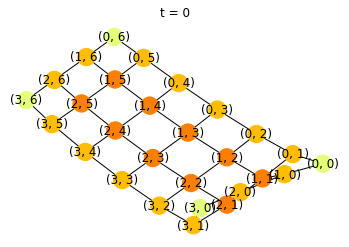

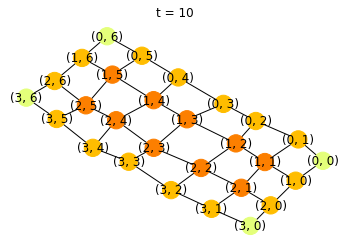

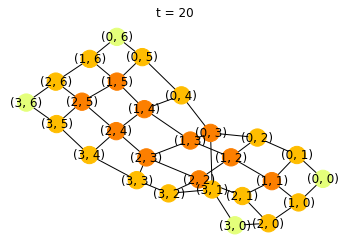

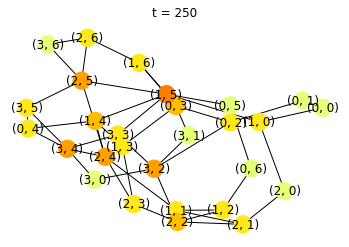

In [54]:
# Run the simulator for 240 steps and show some of the steps.
initialize()
observe()
figure()
print('')

for i in range(10):
    update()
observe()
figure()
print('')

for i in range(10):
    update()
observe()
figure()
print('')

for i in range(230):
    update()
observe()

As seen from the progression above, random edge rewiring does change the topology of the network drastically over time. In the beginning - from $t=0$ to $t=10$, there seems to not be a lot of change in network topology, which makes sense, because rewiring only happens once in every 20 steps (line 35, cell 1). Thus, if we look at $t=20$, we can see that the network starts to change a little, as the random rewiring removes the edge of one of the nodes randomly and adds it randomly to another node. As time passes, the changes become more and more evident, and at $t=240$, the graph is no longer recognizable.

## Sayama Exercise 16.15 on page 359
Simulate the Barabási-Albert network growth model with m  = 1 , m  = 3 , and m  = 5 , and see how the growth process may be affected by the variation of this parameter

In [47]:
interactive = False

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import random as rd
from pylab import *
import networkx as nx
import random as rd

m0 = 5 # number of nodes in initial condition
m = 5 # number of edges per new node

def initialize():
    global g, timestep
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g, timestep
    cla()
    title(f't = {str(timestep)}')
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x = 0
    for i in nds:
        x += g.degree(i)
        if r <= x:
            return i

def update():
    global g, timestep
    timestep += 1
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)
    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


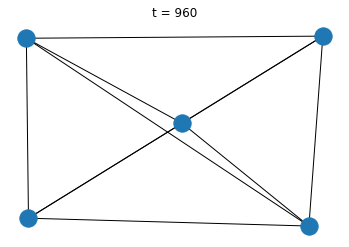

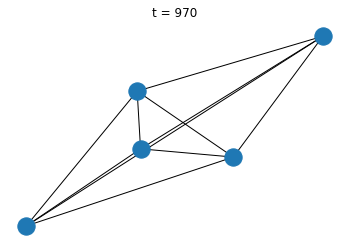

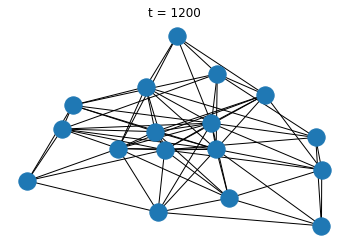

In [48]:
# Run the simulator for 240 steps and show some of the steps.
initialize()
observe()
figure()
print('')

for i in range(10):
    update()
observe()
figure()
print('')

for i in range(230):
    update()
observe()

At $m=1$, the graph quickly became a tree-graph like structure with lots of one-degree nodes. This makes sense, because the new nodes only have 1 edge. At $m=3$, the graph was a little more robust and each node had more edges connected to it, which makes sense because the new nodes now have 3 edges. At $m=5$, the graph was pretty complex and damn near resembles a complete graph, because each of the new nodes now are connected to 5 other nodes, which makes the whole network much more complex.

# Random Extra Stuff

### Watts_Strogatz function in NetworkX

For your information, NetworkX already has a built-in graph generator function for Watts-Strogatz small-world networks, ``watts_strogatz_graph(n, k, p)``. Here, n is the number of nodes, k is the degree of each node, and p is the edge rewiring probability. If you don’t need to simulate the formation of small-world networks iteratively, you should just use this function instead.

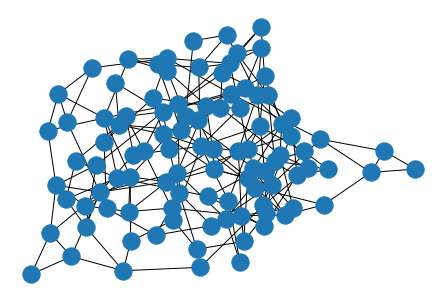

In [32]:
h = nx.watts_strogatz_graph(100, 4, .5)
nx.draw(h)

### How to implement a grid graph

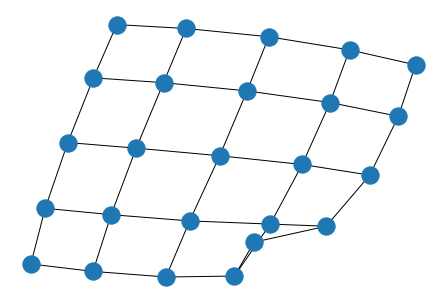

In [30]:
from networkx import grid_graph
G = grid_graph(dim=[5, 5])
nx.draw(G)